[[ 0.96380422 -0.78020657]
 [-0.26641553 -0.11323528]
 [ 0.9383331  -0.16102473]
 [ 0.07940695  0.07894566]
 [ 0.14944815  0.14088578]
 [-0.75657638 -0.68850408]
 [-0.80945765 -0.24842772]
 [ 0.96416551 -0.66236164]
 [-0.63058169  0.17073854]
 [ 0.61273971 -0.20521425]
 [-0.80852277 -0.11590782]
 [-0.90676666 -0.65073416]
 [ 1.         -0.53557099]
 [-0.883387   -0.76326978]
 [ 0.18362217 -0.1746202 ]
 [-0.0864578   0.04376463]
 [ 0.94240873 -0.47388486]
 [ 0.99016629 -0.47686851]
 [-0.63206123  0.01303188]
 [-0.8799591  -0.6191923 ]
 [ 0.24303501  0.12146443]
 [ 0.7299182  -0.6729067 ]
 [-0.8541752  -0.41645049]
 [-0.16949152 -0.16702839]
 [ 0.69289084  0.01506947]
 [-0.89485454 -0.06928938]
 [-0.35899058 -0.34812586]
 [ 0.21873137 -0.21268367]
 [-0.41902496  0.08511174]
 [ 0.99872506 -0.18855742]
 [-0.73043401  0.21179205]
 [ 0.2933818   0.29102072]
 [ 0.95302125 -0.84669447]
 [-1.         -0.62200325]
 [ 0.59129989 -0.58601311]
 [-0.07928865  0.02317501]
 [ 0.95166151  0.17094583]
 

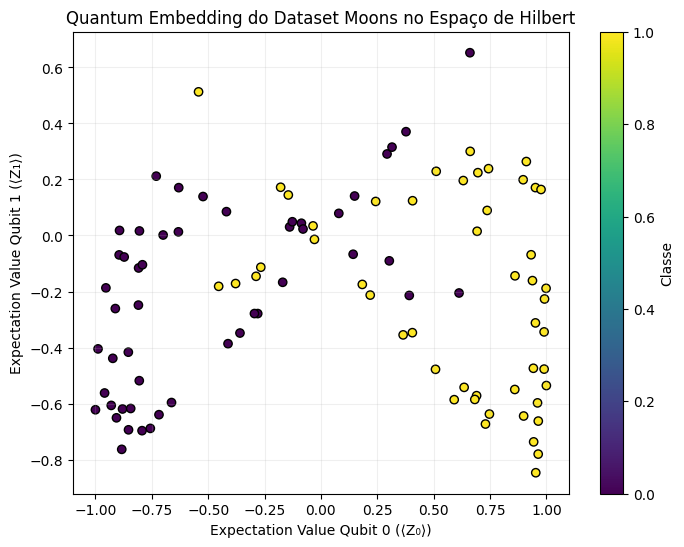

In [1]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import MinMaxScaler

# 1. Gerar dataset "moons"
X, y = make_moons(n_samples=100, noise=0.1, random_state=42)
X = MinMaxScaler(feature_range=(0, np.pi)).fit_transform(X)  # Normalizar para [0, π]

# 2. Configurar dispositivo quântico
dev = qml.device("default.qubit", wires=2)

# 3. Circuito quântico com Angle Encoding
@qml.qnode(dev)
def quantum_embedding(x):
    # Codificar cada feature em um qubit via rotações
    qml.RX(x[0], wires=0)
    qml.RY(x[1], wires=1)
    
    # Adicionar entrelaçamento para não linearidade
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 0])
    
    # Medir expectativas para projeção no espaço de Hilbert
    return qml.expval(qml.PauliZ(0)), qml.expval(qml.PauliZ(1))

# 4. Aplicar embedding a todos os pontos
quantum_reps = np.array([quantum_embedding(x) for x in X])

print(quantum_reps)

# 5. Plotar espaço de Hilbert
plt.figure(figsize=(8, 6))
plt.scatter(quantum_reps[:, 0], quantum_reps[:, 1], c=y, cmap="viridis", edgecolors="k")
plt.xlabel("Expectation Value Qubit 0 (⟨Z₀⟩)", fontsize=10)
plt.ylabel("Expectation Value Qubit 1 (⟨Z₁⟩)", fontsize=10)
plt.title("Quantum Embedding do Dataset Moons no Espaço de Hilbert", fontsize=12)
plt.colorbar(label="Classe")
plt.grid(alpha=0.2)
plt.show()

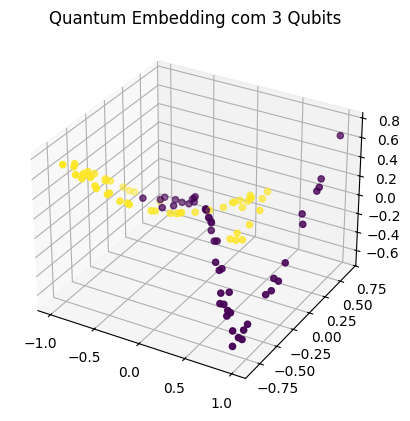

In [6]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import MinMaxScaler

# 1. Gerar dataset "moons"
X, y = make_moons(n_samples=100, noise=0.1, random_state=42)
X = MinMaxScaler(feature_range=(0, np.pi)).fit_transform(X)

# 2. Definir número ajustável de qubits
n_qubits = 3  # Número de qubits = número de features (2 para "moons")
dev = qml.device("default.qubit", wires=n_qubits)

# 3. Circuito quântico genérico com Angle Encoding
@qml.qnode(dev)
def quantum_embedding(x):
    # Codificar cada feature em um qubit via rotações
    for i in range(n_qubits):
        if i % 2 == 0:
            qml.RY(x[0], wires=i)
        else:
            qml.RY(x[1], wires=i)  # RY para cada qubit (alternar com RX se desejar)
    
    # Entrelaçamento ajustável (ex: cadeia de CNOTs)
    for i in range(n_qubits - 1):
        qml.CNOT(wires=[i, i+1])
    
    # Medições dinâmicas (um valor por qubit)
    return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]

# 4. Aplicar embedding e converter para array
quantum_reps = np.array([quantum_embedding(x) for x in X])

# 5. Plotar (2D ou 3D conforme o número de qubits)
if n_qubits == 2:
    plt.scatter(quantum_reps[:, 0], quantum_reps[:, 1], c=y, cmap="viridis")
elif n_qubits == 3:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter3D(quantum_reps[:, 0], quantum_reps[:, 1], quantum_reps[:, 2], c=y)
else:
    print("Use técnicas de redução de dimensionalidade (ex: PCA) para visualização.")

plt.title(f"Quantum Embedding com {n_qubits} Qubits")
plt.show()

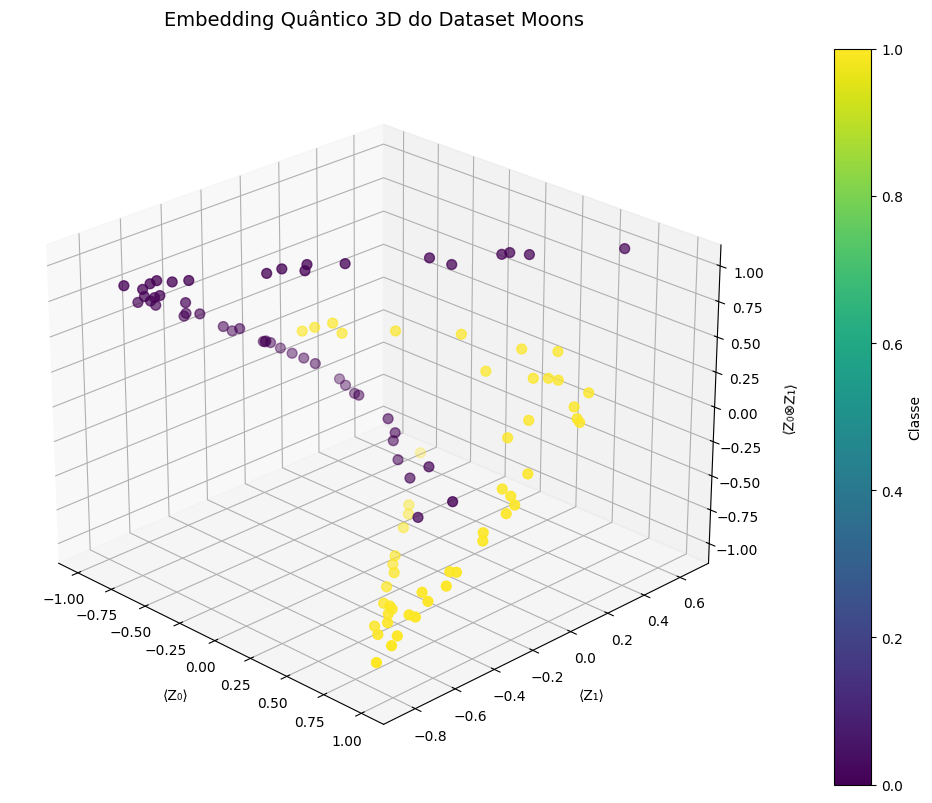

In [2]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D

# 1. Gerar dataset "moons"
X, y = make_moons(n_samples=100, noise=0.1, random_state=42)
X = MinMaxScaler(feature_range=(0, np.pi)).fit_transform(X)

# 2. Configurar dispositivo quântico
dev = qml.device("default.qubit", wires=2)

# 3. Circuito quântico com medição 3D
@qml.qnode(dev)
def quantum_embedding_3d(x):
    # Angle Encoding
    qml.RX(x[0], wires=0)
    qml.RY(x[1], wires=1)
    
    # Entrelaçamento
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 0])
    
    # Medir 3 observáveis para coordenadas 3D
    return (
        qml.expval(qml.PauliZ(0)),       # Eixo X
        qml.expval(qml.PauliZ(1)),       # Eixo Y
        qml.expval(qml.PauliZ(0) @ qml.PauliZ(1))  # Eixo Z (correlação)
    )

# 4. Aplicar embedding
quantum_reps_3d = np.array([quantum_embedding_3d(x) for x in X])

# 5. Plotar 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter3D(
    quantum_reps_3d[:, 0], 
    quantum_reps_3d[:, 1], 
    quantum_reps_3d[:, 2], 
    c=y, 
    cmap="viridis",
    depthshade=True,
    s=50
)

ax.set_xlabel("⟨Z₀⟩", fontsize=10, labelpad=10)
ax.set_ylabel("⟨Z₁⟩", fontsize=10, labelpad=10)
ax.set_zlabel("⟨Z₀⊗Z₁⟩", fontsize=10, labelpad=10)
ax.set_title("Embedding Quântico 3D do Dataset Moons", fontsize=14, pad=20)

# Ajustar perspectiva
ax.view_init(elev=25, azim=-45)  # Ângulo de visualização

# Barra de cores
cbar = plt.colorbar(scatter, pad=0.1)
cbar.set_label("Classe", fontsize=10)

plt.tight_layout()
plt.show()